In [56]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']


#importing the data files onto dataframes
users=users = pd.read_csv('/Users/yuanyuan/Documents/578/ml-100k/u.user', sep='|', names=u_cols, encoding='latin-1', parse_dates=True) 
ratings = pd.read_csv('/Users/yuanyuan/Documents/578/ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')
movies = pd.read_csv('/Users/yuanyuan/Documents/578/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),encoding='latin-1')
movielens=pd.merge(users,ratings)
movielens=pd.merge(movielens,movies)
movielens.head(3)

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...


In [57]:
x1=pd.read_csv('/Users/yuanyuan/Documents/578/ml-100k/u1.base', sep='\t', names=r_cols, encoding='latin-1')
x2=pd.read_csv('/Users/yuanyuan/Documents/578/ml-100k/u2.base', sep='\t', names=r_cols, encoding='latin-1')
x3=pd.read_csv('/Users/yuanyuan/Documents/578/ml-100k/u3.base', sep='\t', names=r_cols, encoding='latin-1')
x4=pd.read_csv('/Users/yuanyuan/Documents/578/ml-100k/u4.base', sep='\t', names=r_cols, encoding='latin-1')
x5=pd.read_csv('/Users/yuanyuan/Documents/578/ml-100k/u5.base', sep='\t', names=r_cols, encoding='latin-1')

y1=pd.read_csv('/Users/yuanyuan/Documents/578/ml-100k/u1.test', sep='\t', names=r_cols, encoding='latin-1')
y2=pd.read_csv('/Users/yuanyuan/Documents/578/ml-100k/u2.test', sep='\t', names=r_cols, encoding='latin-1')
y3=pd.read_csv('/Users/yuanyuan/Documents/578/ml-100k/u3.test', sep='\t', names=r_cols, encoding='latin-1')
y4=pd.read_csv('/Users/yuanyuan/Documents/578/ml-100k/u4.test', sep='\t', names=r_cols, encoding='latin-1')
y5=pd.read_csv('/Users/yuanyuan/Documents/578/ml-100k/u5.test', sep='\t', names=r_cols, encoding='latin-1')



x1_test= x1['rating']
x1_train= x1[['user_id', 'movie_id', 'timestamp']]
x2_test= x2['rating']
x2_train= x2[['user_id', 'movie_id', 'timestamp']]
x3_test= x3['rating']
x3_train= x3[['user_id', 'movie_id', 'timestamp']]
x4_test= x4['rating']
x4_train= x4[['user_id', 'movie_id', 'timestamp']]
x5_test= x5['rating']
x5_train= x5[['user_id', 'movie_id', 'timestamp']]

In [58]:
from sklearn.linear_model import LinearRegression
lreg1=LinearRegression()
lreg1.fit(x1_train,x1_test)

lreg2=LinearRegression()
lreg2.fit(x2_train,x2_test)

lreg3=LinearRegression()
lreg3.fit(x3_train,x3_test)

lreg4=LinearRegression()
lreg4.fit(x4_train,x4_test)

lreg5=LinearRegression()
lreg5.fit(x5_train,x5_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
y1_test= y1['rating']
y1_train=y1[['user_id', 'movie_id', 'timestamp']]
y2_test= y2['rating']
y2_train=y2[['user_id', 'movie_id', 'timestamp']]
y3_test= y3['rating']
y3_train=y3[['user_id', 'movie_id', 'timestamp']]
y4_test= y4['rating']
y4_train= y4[['user_id', 'movie_id', 'timestamp']]
y5_test= y5['rating']
y5_train= y5[['user_id', 'movie_id', 'timestamp']]

y_pred1=lreg1.predict(y1_train)
y_pred2=lreg2.predict(y2_train)
y_pred3=lreg3.predict(y3_train)
y_pred4=lreg4.predict(y4_train)
y_pred5=lreg5.predict(y5_train)


from sklearn import metrics
print (np.sqrt(metrics.mean_squared_error(y1_test,y_pred1)))
print (np.sqrt(metrics.mean_squared_error(y2_test,y_pred2)))
print (np.sqrt(metrics.mean_squared_error(y3_test,y_pred3)))
print (np.sqrt(metrics.mean_squared_error(y4_test,y_pred4)))
print (np.sqrt(metrics.mean_squared_error(y5_test,y_pred5)))

1.1305701864622306
1.1093090680674793
1.0929136610122143
1.0935583679158078
1.1003128650059688


In [32]:
deterministic= ratings[pd.notnull(ratings['rating'])]
randomness=pd.read_csv('/Users/yuanyuan/Documents/578/ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')
randomness['rating'] = randomness.rating.replace(np.NaN, np.random.randint(0,5))

In [48]:
df1 =deterministic['rating'].values
df2 =randomness['rating'].values

In [49]:
import matplotlib.pyplot as plt

(array([    0.,  6110., 11370., 27145., 34174., 21201.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Patch objects>)

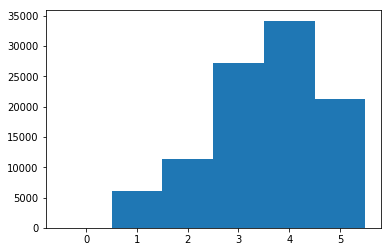

In [115]:
plt.hist(df1,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5])

plt.hist(df2)

(array([ 6110.,     0., 11370.,     0.,     0., 27145.,     0., 34174.,
            0., 21201.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

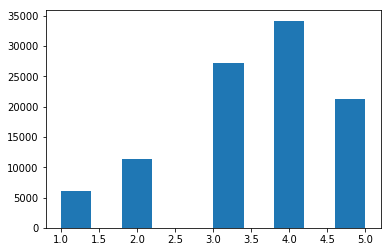

In [51]:
plt.hist(df2)

In [64]:
ratings

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


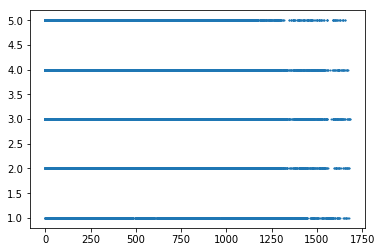

In [66]:
plt.plot(ratings["movie_id"],ratings["rating"],'o',markersize=1)

In [76]:
movie_id_max = ratings["movie_id"].max()
movie_id_min = ratings["movie_id"].min()
num_of_movies = movie_id_max+1-movie_id_min
num_rating_list = np.zeros(num_of_movies)
rating_fraction = np.zeros((num_of_movies,5))
for i in range(int(movie_id_min),int(movie_id_max)+1):
    movie_rating = ratings[ratings["movie_id"]==i]
    number_of_ratings = len(movie_rating)
    index = i -movie_id_min
    num_rating_list[index] = number_of_ratings
    for star in range(0,5):
        num_of_star_rating= len(movie_rating[movie_rating["rating"]==(star+1)])
        rating_fraction[index,star] = num_of_star_rating/(1.*number_of_ratings)

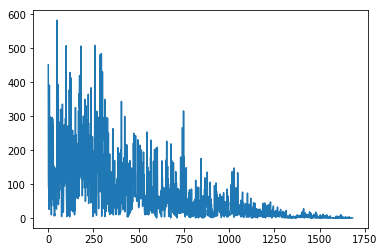

In [77]:
plt.plot(range(int(movie_id_min),int(movie_id_max)+1), num_rating_list )

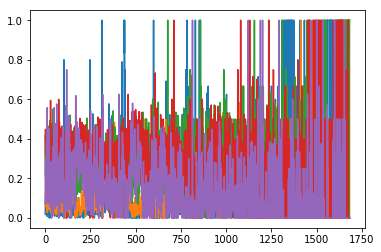

In [78]:
for i in range(5):
    plt.plot(range(int(movie_id_min),int(movie_id_max)+1), rating_fraction[:,i] )
plt.show()

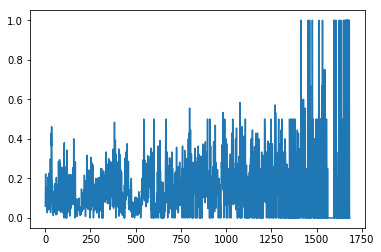

In [80]:
plt.plot(range(int(movie_id_min),int(movie_id_max)+1), rating_fraction[:,0] )

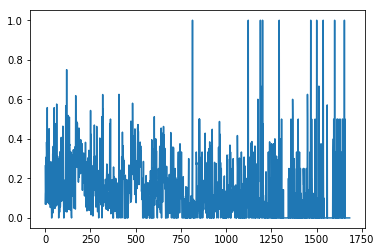

In [82]:
plt.plot(range(int(movie_id_min),int(movie_id_max)+1), rating_fraction[:,4] )

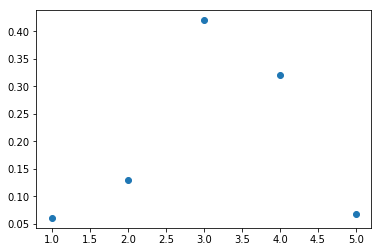

In [140]:
plt.plot(np.linspace(1,5,5),rating_fraction[1,:],'o')

In [137]:
user_id_max = ratings["user_id"].max()
user_id_min = ratings["user_id"].min()
timestamp_max = ratings["timestamp"].max()
timestamp_min = ratings["timestamp"].min()
size = 200
random_x = np.zeros((size,3))
for i in range(size):
    random_x[i,:] = [np.random.randint(user_id_min,user_id_max),1, np.random.randint(timestamp_min,timestamp_max)]
y1 = lreg1.predict(random_x)+ np.random.normal(0.0,1.1,size)
y2 = lreg2.predict(random_x)+ np.random.normal(0.0,1.1,size)
y3 = lreg3.predict(random_x)+ np.random.normal(0.0,1.1,size)
y4 = lreg4.predict(random_x)+ np.random.normal(0.0,1.1,size)
y5 = lreg5.predict(random_x)+ np.random.normal(0.0,1.1,size)
y = np.hstack([y1,y2,y3,y4,y5])


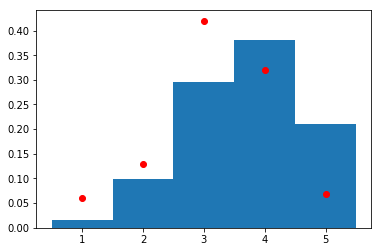

In [141]:
plt.hist(y,bins=[0.5,1.5,2.5,3.5,4.5,5.5],density=True)
plt.plot(np.linspace(1,5,5),rating_fraction[1,:],'ro')

In [123]:
size = 100000
Random_X = np.zeros((size,3))
for i in range(size):
    Random_X[i,:] = [np.random.randint(user_id_min,user_id_max+1),np.random.randint(movie_id_min,movie_id_max+1), np.random.randint(timestamp_min,timestamp_max+1)]
y1 = lreg1.predict(Random_X)+ np.random.normal(0.0,1.1,size)
y2 = lreg2.predict(Random_X)+ np.random.normal(0.0,1.1,size)
y3 = lreg3.predict(Random_X)+ np.random.normal(0.0,1.1,size)
y4 = lreg4.predict(Random_X)+ np.random.normal(0.0,1.1,size)
y5 = lreg5.predict(Random_X)+ np.random.normal(0.0,1.1,size)
y = np.hstack([y1,y2,y3,y4,y5])

(array([0.05526559, 0.19640127, 0.34139717, 0.28761691, 0.11931906]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

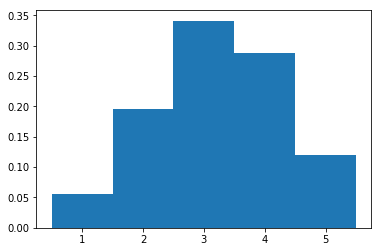

In [124]:
plt.hist(np.round(y),bins=[0.5,1.5,2.5,3.5,4.5,5.5],density=True)

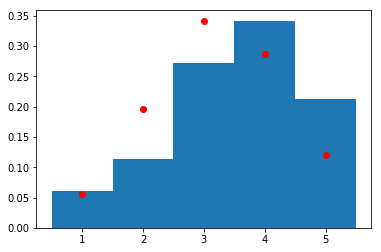

In [142]:
plt.hist(df1,bins=[0.5,1.5,2.5,3.5,4.5,5.5],density=True)
plt.plot(np.array([1,2,3,4,5]),\
    np.array([0.05526559, 0.19640127, 0.34139717, 0.28761691, 0.11931906]),'ro')

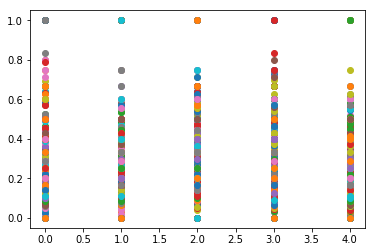

In [127]:
for i in range(int(movie_id_min),int(movie_id_max)+1):
    plt.plot(rating_fraction[i-movie_id_min,:],"o")

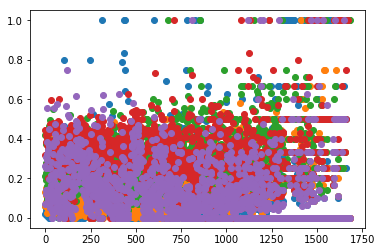

In [128]:
for i in range(0,5):
    plt.plot(rating_fraction[:,i],"o")

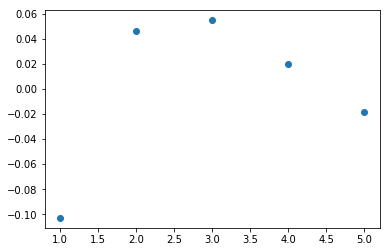

In [162]:
rating_diff = rating_fraction- np.array([0.05526559, 0.19640127, 0.34139717, 0.28761691, 0.11931906])
plt.plot(np.linspace(1,5,5), -np.sum(rating_diff,axis=0)/rating_diff.shape[0],'o')

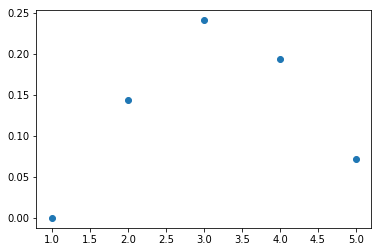

In [161]:
rating_sum = np.sum(rating_fraction,axis=0)
rating_diff = 0.05526559/rating_sum[0] *rating_sum - np.array([0.05526559, 0.19640127, 0.34139717, 0.28761691, 0.11931906])
plt.plot(np.linspace(1,5,5), -(rating_diff),'o')


In [159]:
rating_diff

array([ 0.        , -0.14395435, -0.24125976, -0.19403291, -0.0713364 ])

In [172]:
M = np.zeros((user_id_max-movie_id_min+1, num_of_movies))
for i in range(user_id_min,user_id_max+1):
    user_rating_m = ratings[ratings["user_id"]==i]
    M[i-user_id_min,user_rating_m["movie_id"]-movie_id_min] =user_rating_m["rating"]

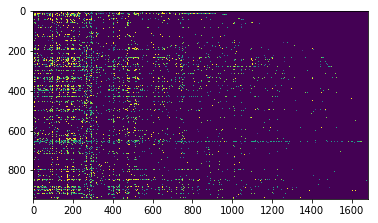

In [174]:
plt.imshow(M)

In [177]:
movie_id_max = ratings["movie_id"].max()
movie_id_min = ratings["movie_id"].min()
num_of_movies = movie_id_max+1-movie_id_min
num_rating_list = np.zeros(num_of_movies)
rating_number = np.zeros((num_of_movies,5))
rating_average = np.zeros(num_of_movies)
for i in range(int(movie_id_min),int(movie_id_max)+1):
    movie_rating = ratings[ratings["movie_id"]==i]
    index = i -movie_id_min
    number_of_ratings = len(movie_rating)
    num_rating_list[index] = number_of_ratings
    for star in range(0,5):
        num_of_star_rating= len(movie_rating[movie_rating["rating"]==(star+1)])
        rating_number[index,star] = num_of_star_rating/number_of_ratings
    rating_average[i-movie_id_min] = np.sum (np.array([1,2,3,4,5])*rating_number[index])
    

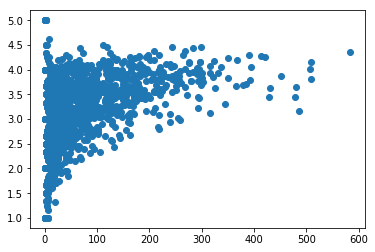

In [179]:
plt.plot(num_rating_list,rating_average,'o')
    